In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(15,10)})
pd.options.display.float_format = "{:,.5f}".format

In [41]:
df = pd.read_csv('data2.txt', sep = ' ')

In [42]:
df.head()

,x
1,0.43243
2,0.81088
3,1.07788
4,0.73403
5,-0.14887


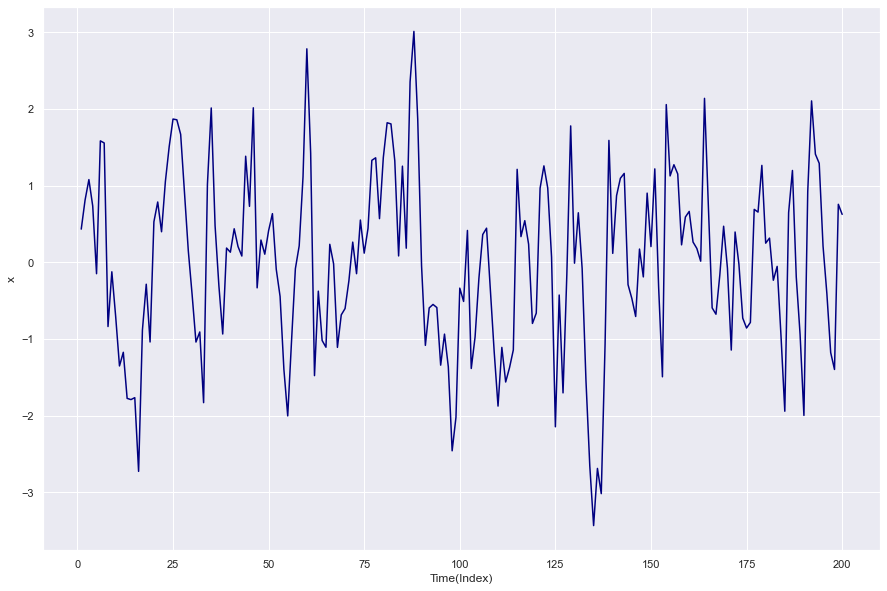

In [43]:
sns.lineplot(data= df['x'],color='#000080')
plt.xlabel('Time(Index)')
plt.ylabel('x')
plt.savefig('timeseries.png',bbox_inches='tight')
plt.show()

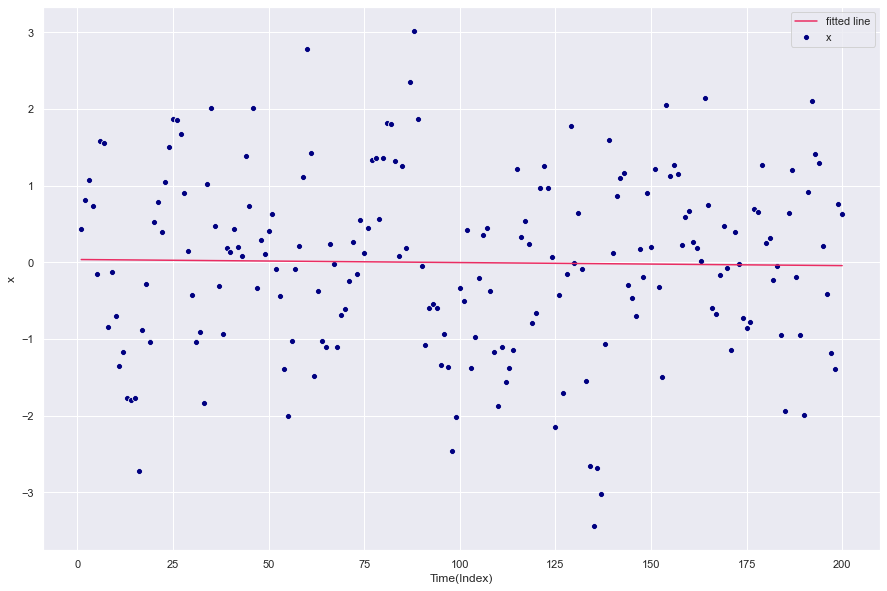

In [44]:
sns.scatterplot(data=df['x'],color='#000080',label='x')
m, b = np.polyfit(df.index,df['x'], 1)
plt.plot(df.index, m*df.index + b,label='fitted line',color='#ea2c62')
plt.xlabel('Time(Index)')
ax.set_aspect('auto')
plt.ylabel('x')
plt.legend()
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['x'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.878767
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


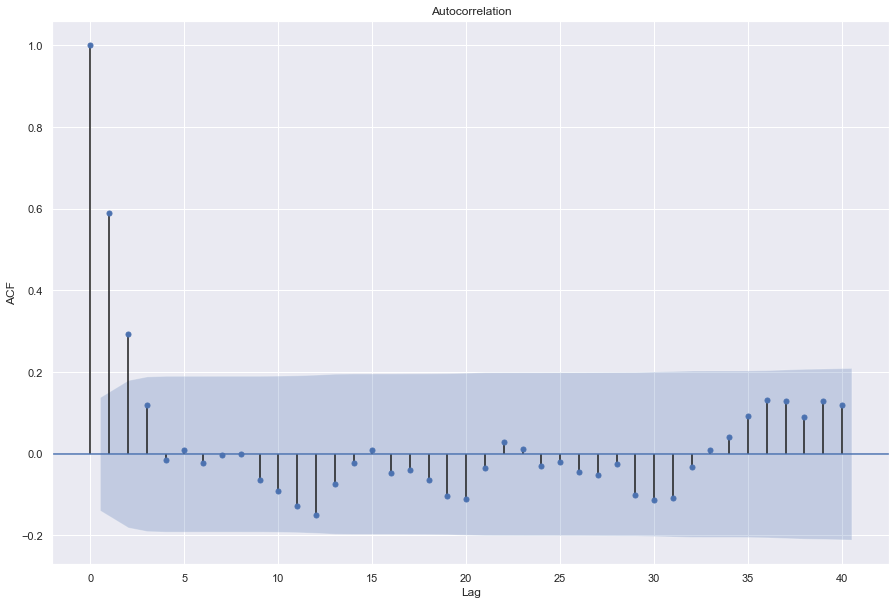

In [46]:
sm.graphics.tsa.plot_acf(df['x'].values, lags=40)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

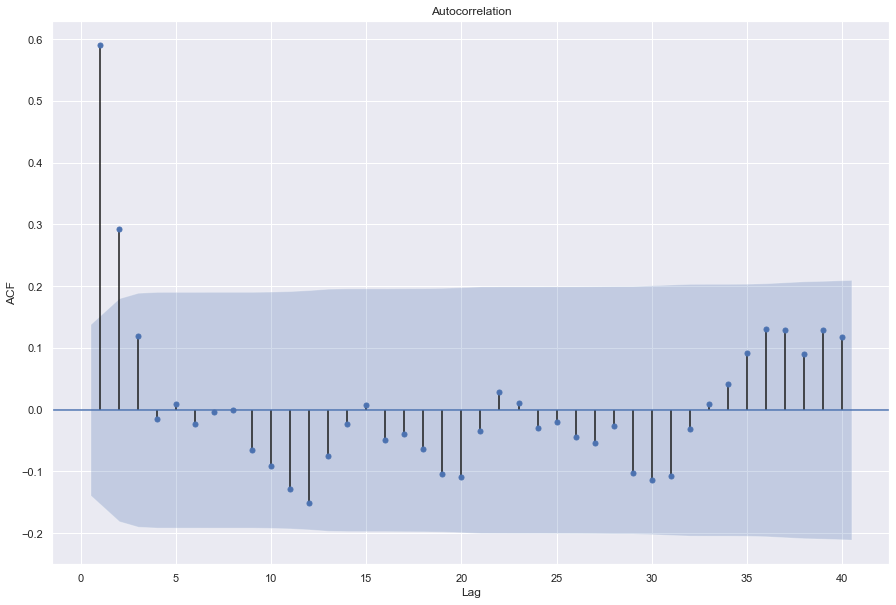

In [47]:
sm.graphics.tsa.plot_acf(df['x'].values, lags=40,zero=False)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.savefig('acf.png',bbox_inches='tight')
plt.show()

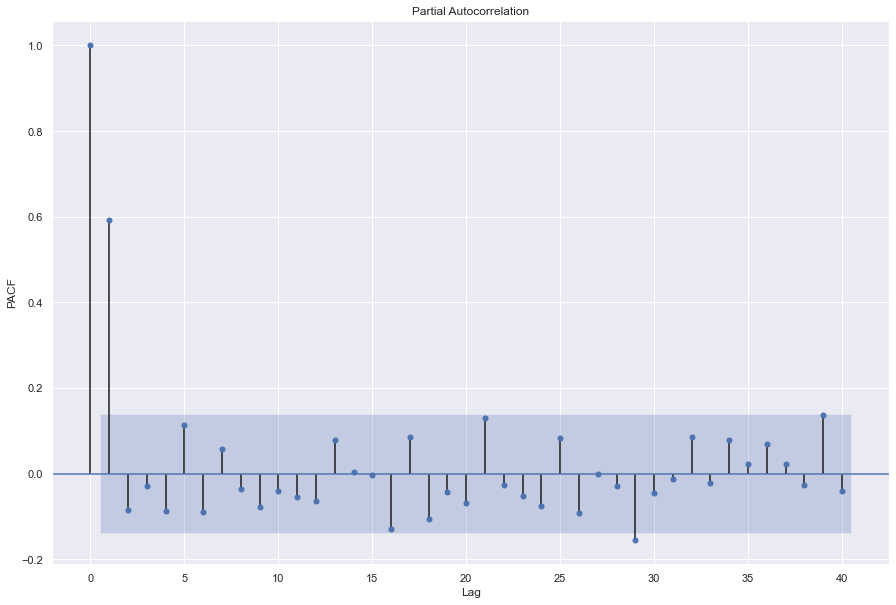

In [48]:
sm.graphics.tsa.plot_pacf(df['x'].values, lags=40)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

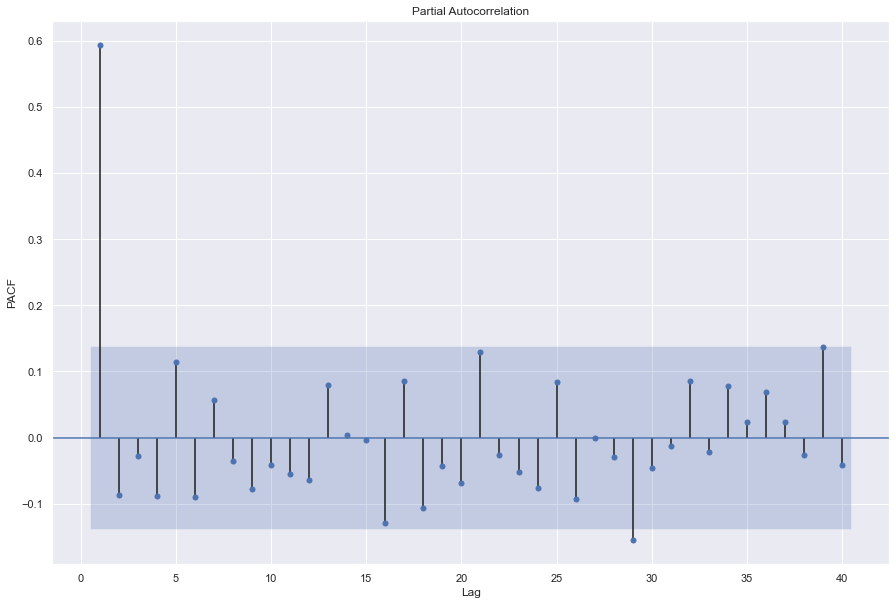

In [49]:
sm.graphics.tsa.plot_pacf(df['x'].values, lags=40,zero=False)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [50]:
ar = AutoReg(df['x'], lags=1, trend='n')
model = ar.fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                -270.478
Method:               Conditional MLE   S.D. of innovations              0.942
Date:                Fri, 20 Nov 2020   AIC                             -0.099
Time:                        23:02:47   BIC                             -0.066
Sample:                             1   HQIC                            -0.086
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x.L1           0.5907      0.057     10.322      0.000       0.479       0.703
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\saket\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
